# Grouping objects

The `Group` class is used to group items together.  This allows you to then manipulate the whole Group as a single object.  This is similar to the "selection" and "group" functionality in Inkscape/Adobe Illustrator, where you can highlight several objects (by e.g. shift-clicking) and move them together.

You can manipulate a Group like any other phidl object, such as:
- move()
- rotate()
- mirror()
- align() 
- distribute()
- and the usual list of attributes (xmin, ymax, center, bbox, etc)

## Creating and manipulating a Group

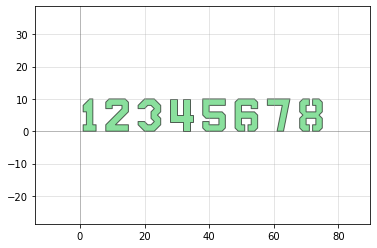

In [8]:
import numpy as np
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

from phidl import Group

# Create a blank Device and add number shapes to it
D = Device()
t1 = D << pg.text('1')
t2 = D << pg.text('2')
t3 = D << pg.text('3')
t4 = D << pg.text('4')
t5 = D << pg.text('5')
t6 = D << pg.text('6')
t7 = D << pg.text('7')
t8 = D << pg.text('8')

# Spread out devices
D.distribute(direction = 'x', spacing = 3)

qp(D) # quickplot it!


Say we want to only move the even numbers. We can create a group of those numbers and move them them up in the Y direction a few units easily:

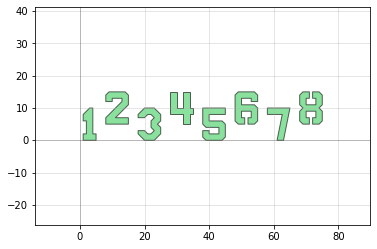

In [9]:
even = Group([t2,t4,t6,t8])
even.movey(5)

qp(D) # quickplot it!

Now let's make a Group out of the odd numbers.  We're going to do this in a slightly different way -- simply by using the `+` operation.

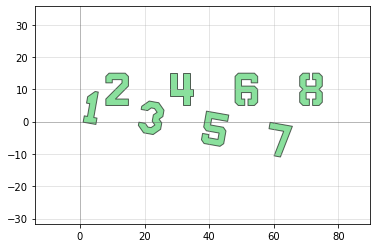

In [10]:
odd = t1 + t3 + t5 + t7 # Create the Group

# Let's rotate the odd numberse slightly by -10 degrees
odd.rotate(-10)

qp(D) # quickplot it!

Any PHIDL object can be  summed in this way to create a Group -- this includes Device, DeviceReference, Port, Polygon, CellArray, and Label. Groups themselves can also be summed. 

We can even add items to groups if we need to:

In [11]:
lessthansix = t1 + t2
lessthansix.add([t3,t4]) # Using the "add" method
lessthansix += t5        # Equivalently, using the '+=' operator

We can also perform the usual manipulations of PHIDL objects like asking where the center is, xmin, ymax, etc. Here we move the entire "even" group (which now has all numbers except for 5) down so the top is aligned with the y==0 axis

15.0


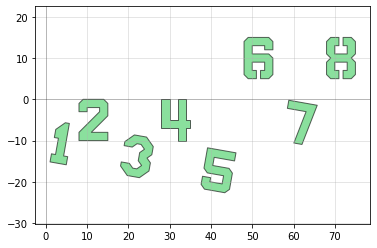

In [12]:
print(lessthansix.ymax)
lessthansix.ymax = 0

qp(D) # quickplot it!

## Align and distribute in Groups
Lastly, we can also align and distribute a Group if we want to:

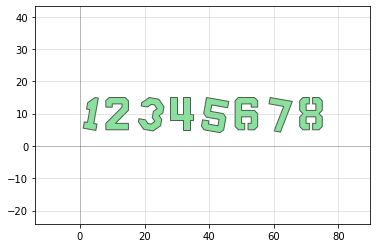

In [13]:
# Make a Group by summing a list of items
all_numbers = (t1+t2+t3+t4+t5+t6+t7+t8)

# Align the ymax of all the numbers
all_numbers.align(alignment = 'ymax')

qp(D) # quickplot it!

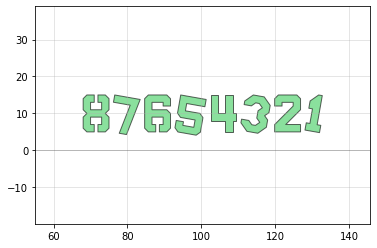

In [14]:
# Closely-distribute the Group with a spacing of 1.2

# Let's reverse the order of the Group by rearranging
# the order of additions.  distribute() will distribute
# according to this order (i.e. from 8 to 1)
all_numbers_reverse = (t8 + t7 + t6 + t5 + t4 + t3 + t2 + t1)
all_numbers_reverse.distribute(direction = 'x', spacing = 1.2, separation = True)

qp(D) # quickplot it!